In [4]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Check GPU usage on M1 MAC / Window

In [5]:
# Window version
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# M1 MAC version
DEVICE = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

print(DEVICE)

mps:0


In [6]:
# MNIST Data Load
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root="path", train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root="path", train=False, download=True, transform=transform)

In [7]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/euntaeklee/Git_Project/data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/euntaeklee/Git_Project/data/
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [8]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [10]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [11]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

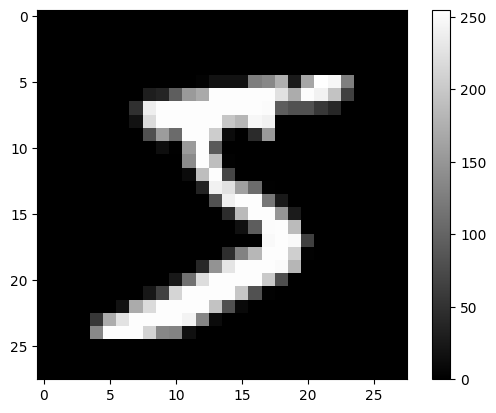

In [27]:
plt.imshow(train_DS.data[0], cmap='gray')
plt.colorbar()

In [13]:
print(train_DS.targets[-1])
print(train_DS.targets.shape)

tensor(8)
torch.Size([60000])


## DataLoader

In [17]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [18]:
print(len(train_DL.dataset))

60000


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor(7)
torch.uint8
torch.float32


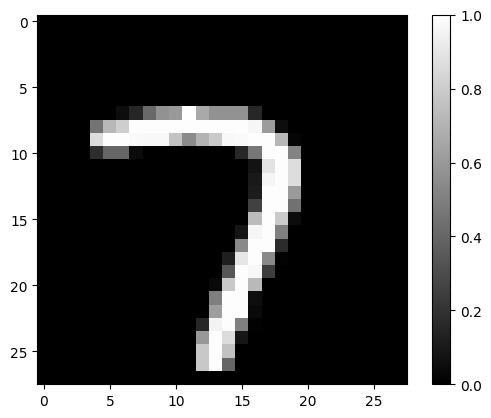

In [34]:
x_batch, y_batch = next(iter(train_DL)) # One data group per batch
print(type(train_DS.data))
print(type(x_batch.data))
print(x_batch.shape)
print(y_batch.shape)
plt.imshow(x_batch[0].squeeze(), cmap='gray')  # if you want to get image, you should use .squeeze() function
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype)
# Role of ToTenser
# 1. change to tensor form
# 2. change to "numberxchannelxrowxcolumn" form
# 3. switch to 0 to 1 (int -> float)

## Make Model

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(784, 100),
            nn.ReLU(),
            nn.Linear(100, 10))

    def forward(self, x):
        x = self.linear(x)

        return x